# Exam 2

## 1. Introduction
The companion Google Form for this exam includes a set of questions that you can only answer by writing code. That code must be entered into this notebook.

Some requirements: 
1. This notebook must clearly **show all the work necessary to answer each question** in the Google Form.
1. **Your code must unambiguously show that you have answered each question**.  For questions where you are unable to determine the answer using code, include descriptive text explaining what you believe to be the answer, and any reason you are unable to show it in the code.
1. All code in this notebook must be **well-documented using Markdown**.  Indicate each question you are answering and clearly describe what each block of code is doing.  Your ability to write well-formatted Markdown that clearly explains your work will be factored into your grade.
1. Once you have determined the answer to each question, remember to **enter the answer for each question into the Google Form** - we need both this notebook and the completed Google Form in order to grade your work.
1. Save this notebook and **push this repository to GitHub when done**.
1. If the data contains any factual inaccuracies, please ignore them. Consider all the questions in relation to the dataset.


In [13]:
# given code... do not modify
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

df = pd.read_csv('data/athlete_events.csv')

## 2. Data source and definitions
The data used in this notebook comes from the [120 years of Olympic history: athletes and results](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?resource=download) and represents historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. 

In general, each row indicate the details of participation of an athelete in a particluar Olympic event. A few important points regarding the fields in this data: 
- It is extremely significant to note that this dataset represents an athlete's perspective. If a country wins a medal in a team sport, its medal count will be equal to the number of team members, rather than just one.
- `ID` represents a unique id of an athlete. Since a particular athlete may participate multiple times (in different events), there may be multiple rows with the same `ID` indicating the same athelete participated in multiple events.
- `Medal` represents the medal won by an athlete. Please note it can be null if no medal was won by an athlete at an event. The null rows should not be considered in any questions related to medals won.
- `Team` indicates the country an athlete represents in an event. Please use this field for any country-related questions.

## 3. Data sample

In [2]:
# given code... do not modify
# do not remove duplicates df = df.drop_duplicates()
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


# Your Work
Add all the code and documentation you need to answer the exam questions below this block.  Keep your notebook organized so it is obvious which question you are answering (no need to repeat the entire question) and the order of answers follows the order of the questions in the exam.


Q1. How many rows are there in the original DataFrame ?

##### Use the `shape` function and the index 0 which represents rows to get the number of rows in the original DataFrame

In [3]:
df.shape[0]

271116

Q2. How many unique events have been held in Summer and Winter olympics over all the years? 

##### Prove that there are only "Summer" and "Winter" in the `Season` column

In [4]:
df['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

##### Count the number of unique events

In [131]:
events = df['Event'].unique()
len(events)

765

Q3. Which command would create a pandas DataFrame that contains the data for medal winners?

##### Use the `notnull` function on the `Medal` column to remove "NA" and get medal winners

In [6]:
df_medals = df[df['Medal'].notnull()]

Q3.1 Assuming the variable « df_medals » refers to a DataFrame containing only those rows from the original data set relate to medals winner, with no other modifications, which of the following commands would create a data structure including each Olympics games and the minimum and maximum age of olympic medal winner?

##### 

##### Use the `describe` function to get a summary of statistical information about `df_medals`

In [7]:
df_medals.groupby('Games')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Games,,,,,,,,
1896 Summer,101.0,23.217822,4.283933,10.0,20.0,23.0,26.00,36.0
1900 Summer,468.0,28.433761,8.999280,15.0,22.0,26.0,33.00,71.0
1904 Summer,422.0,26.485782,9.374172,14.0,21.0,24.0,28.75,68.0
1906 Summer,307.0,26.931596,7.936341,14.0,22.0,25.0,29.00,54.0
1908 Summer,765.0,27.739869,7.871617,16.0,22.0,26.0,31.00,60.0
1912 Summer,934.0,27.506424,7.738869,15.0,22.0,26.0,31.00,64.0
1920 Summer,1178.0,29.669779,8.311509,13.0,24.0,28.0,35.00,72.0
1924 Summer,781.0,27.793854,7.649351,14.0,22.0,26.0,32.00,56.0
1924 Winter,120.0,30.533333,8.703263,18.0,25.0,28.0,33.25,58.0


Q4. How many times has Usain St. Leo Bolt won a gold medal?

##### Filter `df_medals` to find the rows where the athlete's name is 'Usain St. Leo Bolt' and the medal won is 'Gold', and return the number of rows using the `shape` function with index 0

In [8]:
df_medals[(df_medals['Name'] == 'Usain St. Leo Bolt') & (df_medals['Medal'] == 'Gold')].shape[0]

8

Q5. Which country has participated most often in an Olympic event?

##### The first line creates a Pandas Series object called country_counts, which contains the times of participation in Olympic events of each country. The second line retrieve the name of the country that participated most often by calling the index 0, or the first item, since value_counts() sorts the counts in descending order

In [91]:
country_counts = df['Team'].value_counts()
country_counts.index[0]

'United States'

Q6. Which athlete has participated in the most Olympic events without ever winning a medal?

##### First, I sort the athletes in `df` by the number of events they have participated in (in descending order). Second, I loop through each athlete's name and create a new DataFrame `medals_won` containing all the rows in `df` where that athlete won a medal. The first name with the length of `medals_won` equal to 0 is the athlete who has participated the most without winning a medal, so I break the loop after the first athlete without a medal is found

In [124]:
player = df['Name'].value_counts().sort_values(ascending=False)
for name in player.index:
    medals_won = df[(df['Name'] == name) & (df['Medal'].notnull())]
    if len(medals_won) == 0:
        print(name)
        break

Joseph "Josy" Stoffel


Q7. Find the average age of female athletes at the 1998 Winter Olympics?

##### Filter `df` to select rows about female athletes at the 1998 Winter Olympics and then take the mean of the `Age` column

In [94]:
df[(df['Year'] == 1998) & (df['Season'] == 'Winter') & (df['Sex'] == 'F')]['Age'].mean()

24.353323699421967

Q8. How many athletes have competed in both the summer and winter olympics?

##### First, I select all the rows from `df` where the `Season` column is equal to 'Summer' and 'Winter' and select only the unique `ID` values. Second, I find the intersection of the two sets of unique athletes using the '&' operator. Finally, I find the number of athletes competing in both the summer and winter olympics by finding the length of `both_athletes`

In [128]:
summer_athletes = df[df['Season'] == 'Summer']['ID'].unique()
winter_athletes = df[df['Season'] == 'Winter']['ID'].unique()
both_athletes = set(summer_athletes) & set(winter_athletes)
len(both_athletes)

163

Q9. How many gold medals did the United States win at the 2004 Summer Olympics? Note: For team sports, each team member's individual medal is counted as one, e.g. a team of 4 that wins a Gold medal for the US would add 4 medals to the US medal count, not just 1.

##### Create a new dataframe called `df_usa_2004` that contains all the rows where the year is 2004, the team is the United States, and the medal won is Gold using the '&' operator, and return the number of its rows by finding its length

In [96]:
df_usa_2004 = df[(df['Year'] == 2004) & (df['Team'] == 'United States') & (df['Medal'] == 'Gold')]
len(df_usa_2004)

115

Q10. Which winter Olympics have produced the least medals for the United States?

##### Filtering `df_medals` for rows where the `Season` column is 'Winter' and the `Team` column is 'United States'. Then, group the rows by the `Year` column, and count the number of medals won by the US in each year. Finally, sort the counts in ascending order and select the year with the smallest number of medals using index[0]

In [97]:
df_winter_usa = df_medals[(df_medals['Season'] == 'Winter') & (df_medals['Team'] == 'United States')]
df_winter_usa.groupby('Year')['Medal'].count().sort_values(ascending=True).index[0]

1928

Q11. What is the name of the Sport (Event) which won the most gold medals for Team USA in Olympics history? 

##### Select rows from `df` where the `Team` column is 'United States' and the `Medal` column is 'Gold'. Then, count the number of times each unique value occurs in the `Event` column and sort them in descending order. Finally, select the name of the event winning the most gold medals for Team USA in Olympics history using index[0]

In [98]:
usa_gold = df[(df['Team'] == 'United States') & (df['Medal'] == 'Gold')]
usa_gold['Event'].value_counts().sort_values(ascending=False).index[0]

"Basketball Men's Basketball"

Q12. From 2000-2021, which athlete won the most gold medals? (including both Summer and Winter)? 

##### Filters `df_medals` to only include data from the years 2000 to 2021. Then, further filter the data to only include rows where the medal won is Gold. Finally, count the number of gold medals won by each athlete and return the name of the athlete with the most gold medals

In [99]:
df_filtered = df_medals[(df_medals['Year'] >= 2000) & (df_medals['Year'] <= 2021)]
df_filtered[df_filtered['Medal'] == 'Gold']['Name'].value_counts().head(1)

Michael Fred Phelps, II    23
Name: Name, dtype: int64

Q13. What is the total number of Gold medal won by India till now (including both Summer and Winter)?

##### First, create a new dataframe `india_gold` containing only rows where the team is 'India' and the medal is 'Gold'. Then, count the number of rows in `india_gold` on the 'Medal' column, which gives the total number of gold medals won by India

In [100]:
india_gold = df_medals[(df_medals['Team'] == 'India') & (df_medals['Medal'] == 'Gold')]
india_gold['Medal'].count()

138

Q14. Which country won the second-highest number of medals at the 1976 Summer Olympics?

##### First, filter `df` for the year 1976 and the Summer Olympics. Then, group the resulting DataFrame `df_1976_summer` by the `Team` column, and count the number of medals each team won. Finally, sort the counts in descending order and find the country won the second-highest number of medals at the 1976 Summer Olympics using index[1]

In [101]:
df_1976_summer = df[(df['Year'] == 1976) & (df['Season'] == 'Summer')]
df_1976_summer.groupby('Team')['Medal'].count().sort_values(ascending=False).index[1]

'East Germany'

Q15. Where were the 1998 Winter Olympics held?

##### Filter `df` based on two conditions: the year is 1998 and the season is "Winter". Then, find the city where the 1998 Winter Olympics held using the iloc method with an index of 0

In [102]:
df[(df['Year'] == 1998) & (df['Season'] == 'Winter')]['City'].iloc[0]

'Nagano'

Q16. In the 2012 Summer Olympics, which of the following countries won more medals than it did in the 2008 Summer Olympics?  Multiple Choice

Canada, Australia, France, Kenya, United States

##### Filter the DataFrame to include only rows where the year is 2008 or 2012 and the season is Summer. Then, create a list containing the five countries. Third, use a for loop to get the total number of medals for each country in each year. Finally, check which countries won more medals in 2012 than in 2008

In [135]:
year_2008 = df[(df['Year'] == 2008) & (df['Season'] == 'Summer')]
year_2012 = df[(df['Year'] == 2012) & (df['Season'] == 'Summer')]
countries = ['Canada', 'Australia', 'France', 'Kenya', 'United States']
for country in countries:
    medals_2008 = len(year_2008[(year_2008['Team'] == country) & (year_2008['Medal'].notnull())])
    medals_2012 = len(year_2012[(year_2012['Team'] == country) & (year_2012['Medal'].notnull())])
    if medals_2012 > medals_2008:
        print(country, "won more medals in 2012 than in 2008")

Canada won more medals in 2012 than in 2008
France won more medals in 2012 than in 2008


Q17. Find the ratio of female and male participants(number of femal/number of male) in year 2000. Note: If for example a player has participated in more than one event then count them once. 

##### Filter `df` for the year 2000. Then, count the number of unique female and male participants. Finally, calculate the ratio of female and male participants

In [132]:
df_2000 = df[df['Year'] == 2000]
female = df_2000[df_2000['Sex'] == 'F']['ID'].unique()
num_female = len(female)
male = df_2000[df_2000['Sex'] == 'M']['ID'].unique()
num_male = len(male)
num_female / num_male

0.6183310533515732

Q18. What is the average number of medals won by Germany between 1964 and 2008 at the Summer Olympics?

##### Filter `df` for Team Germany in the Summer Olympics between 1964 and 2008. Then, group the new DataFrame by years and count the medals won. Finally, calculate the average number of medals won by Germany

In [105]:
df_summer_germany = df[(df['Season'] == 'Summer') & (df['Year'] >= 1964) & (df['Year'] <= 2008) & (df['Team'] == 'Germany')]
germany_medals = df_summer_germany.groupby('Year')['Medal'].count()
germany_medals.mean()

132.0

Q19. Which plotting technique would you use to compare the  total medals won by Germany between 1964 and 2008? Plot a graph, showing the same.

##### First, create a bar chart using the year (germany_medals.index) as the x-axis values and the number of medals (germany_medals.values) as the y-axis values. Second, set the x-axis and y-axis labels respectively. Third, sets the title of the chart. Finally, display the chart

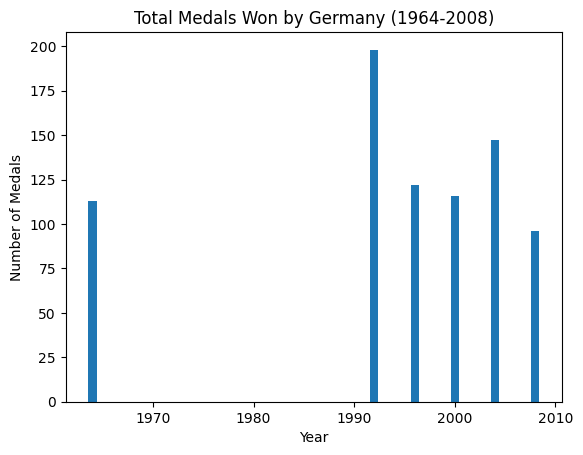

In [106]:
plt.bar(germany_medals.index, germany_medals.values)
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Total Medals Won by Germany (1964-2008)')
plt.show()